In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1_l2,l2

with open('/content/drive/MyDrive/781_Project/gtzan_mfcc.json', "r") as file:
    data = json.load(file) #Load MFCC dataset from JSON file

X = np.array(data["mfcc"]) #Load MFCCs 
y = np.array(data["labels"]) #Load corresponding genre names



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0) #Splitting data into random training and test sets


In [ ]:
X_train = X_train[..., np.newaxis] #Increase dimension of array by one
X_test = X_test[..., np.newaxis] #Increase dimension of array by one


In [ ]:
from keras.callbacks import ReduceLROnPlateau
rlrop = ReduceLROnPlateau(monitor='val_accuracy', factor=0.1, patience=4) #Reduce learning rate when a metric has stopped improving

model = Sequential() #Initializing a sequential model


model.add(Conv2D(256,kernel_size=(5,5),input_shape=(X_train.shape[1],X_train.shape[2],1),padding='same',kernel_initializer='he_uniform')) #Add a 2D convolution layer
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(MaxPool2D(pool_size=(2,2))) #Add a layer for max pooling operation on 2D spatial data

model.add(Conv2D(128, kernel_size = (5,5),activation ='relu',padding='same', kernel_initializer='he_uniform')) #Add a 2D convolution layer
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(MaxPool2D(pool_size=(2,2))) #Add a layer for max pooling operation on 2D spatial data


model.add(Conv2D(64, kernel_size = (5,5),activation ='relu',padding='same', kernel_initializer='he_uniform')) #Add a 2D convolution layer
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(MaxPool2D(pool_size=(2,2))) #Add a layer for max pooling operation on 2D spatial data


model.add(Flatten()) #Flattens the input vector


model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(Dropout(0.2)) #Add dropout to inputs to avoid overfitting 


model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform')) #Add a densely connected layer to the neural network
model.add(BatchNormalization()) #Add a layer to normalize the inputs
model.add(Dropout(0.2)) #Add dropout to inputs to avoid overfitting 


model.add(Dense(10, activation = "softmax")) #Add a densely connected output layer to the neural network

In [ ]:
optimiser = Adam(learning_rate=0.001) #Initialize Adam optimizer for training
model.compile(optimizer=optimiser,loss='sparse_categorical_crossentropy',metrics=['accuracy']) #Configures the model for training

In [ ]:
model.summary() #Prints a string summary of the network

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 130, 13, 256)      6656      
                                                                 
 batch_normalization (BatchN  (None, 130, 13, 256)     1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 65, 6, 256)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 65, 6, 128)        819328    
                                                                 
 batch_normalization_1 (Batc  (None, 65, 6, 128)       512       
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=40,verbose=2,callbacks=[rlrop]) #Trains the model for a fixed number of epochs

Epoch 1/40
250/250 - 41s - loss: 1.7576 - accuracy: 0.3898 - val_loss: 1.5811 - val_accuracy: 0.4140 - lr: 0.0010 - 41s/epoch - 166ms/step
Epoch 2/40
250/250 - 9s - loss: 1.3414 - accuracy: 0.5179 - val_loss: 1.5974 - val_accuracy: 0.4395 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 3/40
250/250 - 9s - loss: 1.1804 - accuracy: 0.5798 - val_loss: 1.2322 - val_accuracy: 0.5510 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 4/40
250/250 - 9s - loss: 0.9966 - accuracy: 0.6516 - val_loss: 1.3785 - val_accuracy: 0.5720 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 5/40
250/250 - 9s - loss: 0.8735 - accuracy: 0.7047 - val_loss: 1.0474 - val_accuracy: 0.6185 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 6/40
250/250 - 9s - loss: 0.7653 - accuracy: 0.7361 - val_loss: 0.9050 - val_accuracy: 0.7025 - lr: 0.0010 - 9s/epoch - 36ms/step
Epoch 7/40
250/250 - 9s - loss: 0.6899 - accuracy: 0.7616 - val_loss: 0.7260 - val_accuracy: 0.7485 - lr: 0.0010 - 9s/epoch - 37ms/step
Epoch 8/40
250/250 - 9s - loss: 0.6065 - accu

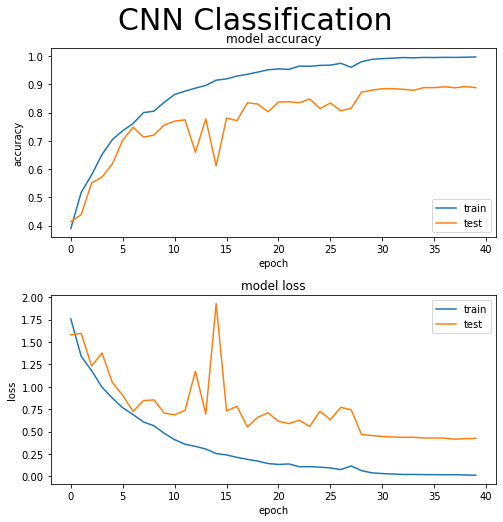

In [ ]:
 import matplotlib.pyplot as plt
plt.figure(figsize=(7,7)) #Setting plot dimensions

#Plotting training and test accuracy of model
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plotting training and test loss of model
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.suptitle('CNN Classification',fontsize=30,y=1.03)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
labelNames = ['pop','metal','disco','blues','reggae','classical','rock','hiphop','country','jazz']
predictions = model.predict(X_test, batch_size=32) #Use model to predict on the test data

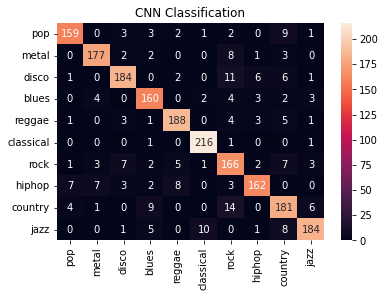

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
matrix = confusion_matrix(y_test, predictions.argmax(axis=1)) #Compute confusion matrix to evaluate the accuracy of a classification
sns.heatmap(matrix,annot=True,fmt='d',yticklabels=labelNames,xticklabels=labelNames) #Plot confusion matrix as a heatmap
plt.title('CNN Classification');

In [ ]:
model.save('/content/drive/MyDrive/781_Project/music_cnn.h5')